# Assignment 4

The assignment 4 contains 3 questions and the due date is May 9th (Sunday) 23:59PM.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

## Question 1 Celonis Automation Bootcamp (20 points)

In this question, you are simply asked to complete the bootcamp and upload the badge or compleion proof. 


In [2]:
#ye

## Question 2 Training a deep neural network (80 points)

Practice training a deep neural network on the CIFAR10 image dataset:


In [3]:
!pip install tensorflow

You should consider upgrading via the 'c:\users\anton\anaconda3\python.exe -m pip install --upgrade pip' command.


In [4]:
# TensorFlow ≥2.0 is required
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.cifar10.load_data()

X_train = X_train_full[5000:]
y_train = y_train_full[5000:]
X_valid = X_train_full[:5000]
y_valid = y_train_full[:5000]

In [5]:
X_train.shape

(45000, 32, 32, 3)

In [42]:
X_valid.shape

(5000, 32, 32, 3)

### Question 2.1 (10 points) 

Build a Deep Neural Network (DNN) with 20 hidden layers of 100 neurons each (that’s too many, but it’s the point of this question), using the RELU activation function.

Using Adam optimization, train the network on the CIFAR10 dataset. You can load it with keras.datasets.cifar10.load_ data() (see code below). The dataset is composed of 60,000 32 × 32–pixkeras.layers.Dense(10, activation="relu", kernel_initializer="he_normal")el color images (50,000 for training, 5000 of which is for validation, 10,000 for testing) with 10 classes using sparse_categorical_crossentropy loss function , so you’ll need a softmax output layer with 10 neurons. 

Train the model for 100 epochs, explain whether the model will experience overfitting. 

In [43]:
init = keras.initializers.VarianceScaling(scale=2., mode='fan_avg',distribution='uniform')
keras.layers.Dense(20, activation="relu", kernel_initializer=init)

In [44]:
_20_100_layers = [100]*20

model = keras.models.Sequential()

model.add(keras.layers.Flatten(input_shape=[32, 32,3]))

for n_hidden in _20_100_layers:
    model.add(keras.layers.Dense(n_hidden, activation="relu", kernel_initializer="he_normal"))
    
model.add(keras.layers.Dense(10, activation="softmax"))

In [45]:
#optimizer = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999) is the optimizer we will be using

In [46]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer= keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999),
              metrics=["accuracy"])

In [47]:
history = model.fit(X_train, y_train, epochs=100,validation_data=(X_valid, y_valid))

Epoch 1/100
1407/1407 [==============================] - 9s 6ms/step - loss: 4.1351 - accuracy: 0.1835 - val_loss: 1.9890 - val_accuracy: 0.2650
Epoch 2/100
1407/1407 [==============================] - 8s 6ms/step - loss: 1.9952 - accuracy: 0.2552 - val_loss: 1.8912 - val_accuracy: 0.2836
Epoch 3/100
1407/1407 [==============================] - 9s 6ms/step - loss: 1.9491 - accuracy: 0.2823 - val_loss: 1.9572 - val_accuracy: 0.2838
Epoch 4/100
1407/1407 [==============================] - 8s 6ms/step - loss: 1.9287 - accuracy: 0.2872 - val_loss: 1.9180 - val_accuracy: 0.2988
Epoch 5/100
1407/1407 [==============================] - 9s 6ms/step - loss: 1.9035 - accuracy: 0.3002 - val_loss: 1.8570 - val_accuracy: 0.3108
Epoch 6/100
1407/1407 [==============================] - 8s 6ms/step - loss: 1.9070 - accuracy: 0.3008 - val_loss: 1.8027 - val_accuracy: 0.3380
Epoch 7/100
1407/1407 [==============================] - 9s 6ms/step - loss: 1.8802 - accuracy: 0.3076 - val_loss: 1.8218 - val_ac

In [48]:
model.evaluate(X_valid, y_valid)

157/157 [==============================] - 0s 2ms/step - loss: 1.8784 - accuracy: 0.2946


[1.878420114517212, 0.2946000099182129]

### Question 2.2 (10 points)

Try reduce the overfitting with weight regularization. You can try to add a L2-norm penalty term as the kernel_regularizer. Repeat the previous training process and explain whether regularization helps achieve a better result.

In [49]:
_20_100_layers = [100]*20

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32,3]))

for n_hidden in _20_100_layers:
    model.add(keras.layers.Dense(n_hidden, activation="relu", kernel_initializer="he_normal", kernel_regularizer=keras.regularizers.l2(0.01)))

model.add(keras.layers.Dense(10, activation="softmax", kernel_regularizer=keras.regularizers.l2(0.01)))

In [50]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999),
              metrics=["accuracy"])

In [51]:
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid))

Epoch 1/100
1407/1407 [==============================] - 12s 8ms/step - loss: 28.2626 - accuracy: 0.2016 - val_loss: 22.0855 - val_accuracy: 0.2774
Epoch 2/100
1407/1407 [==============================] - 10s 7ms/step - loss: 19.2639 - accuracy: 0.2879 - val_loss: 16.6168 - val_accuracy: 0.3186
Epoch 3/100
1407/1407 [==============================] - 10s 7ms/step - loss: 14.2528 - accuracy: 0.3186 - val_loss: 12.0326 - val_accuracy: 0.2880
Epoch 4/100
1407/1407 [==============================] - 10s 7ms/step - loss: 9.9862 - accuracy: 0.3264 - val_loss: 8.0551 - val_accuracy: 0.3564
Epoch 5/100
1407/1407 [==============================] - 10s 7ms/step - loss: 6.5859 - accuracy: 0.3157 - val_loss: 5.2029 - val_accuracy: 0.3172
Epoch 6/100
1407/1407 [==============================] - 11s 8ms/step - loss: 4.2456 - accuracy: 0.3040 - val_loss: 3.5612 - val_accuracy: 0.2692
Epoch 7/100
1407/1407 [==============================] - 10s 7ms/step - loss: 2.9937 - accuracy: 0.2804 - val_loss: 2.

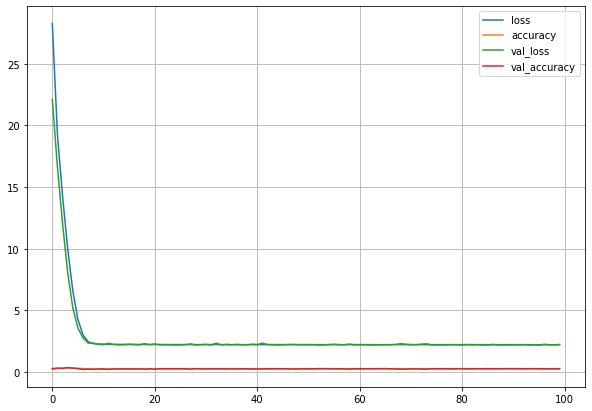

In [52]:
pd.DataFrame(history.history).plot(figsize=(10, 7))
plt.grid(True)

plt.show()

In [53]:
model.evaluate(X_train, y_train)

1407/1407 [==============================] - 4s 3ms/step - loss: 2.2280 - accuracy: 0.2572


[2.2280304431915283, 0.25717777013778687]

In [54]:
model.evaluate(X_valid, y_valid)

157/157 [==============================] - 0s 3ms/step - loss: 2.2308 - accuracy: 0.2666


[2.23083758354187, 0.26660001277923584]

The regularization reduces the overfitting, as a result, the evaluation of the model reveals lower accuracy making it seem the model is worse but it is actually better.

### Question 2.3 (10 points)

Now try adding Batch Normalization and compare the learning curves: Is it converging faster than before? Does it produce a better model? How does it affect training speed?

In [55]:
_20_100_layers = [100]*20

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32,3]))

for n_hidden in _20_100_layers:
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Dense(n_hidden, activation="relu", kernel_initializer="he_normal", kernel_regularizer=keras.regularizers.l2(0.01)))

model.add(keras.layers.Dense(10, activation="softmax", kernel_regularizer=keras.regularizers.l2(0.01)))

In [56]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999),
              metrics=["accuracy"])

C:\Users\anton\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [57]:
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid))

Epoch 1/100
1407/1407 [==============================] - 25s 14ms/step - loss: 27.0962 - accuracy: 0.1876 - val_loss: 15.5927 - val_accuracy: 0.2478
Epoch 2/100
1407/1407 [==============================] - 19s 13ms/step - loss: 10.0037 - accuracy: 0.2514 - val_loss: 6.0713 - val_accuracy: 0.2364
Epoch 3/100
1407/1407 [==============================] - 19s 13ms/step - loss: 4.1405 - accuracy: 0.2422 - val_loss: 3.1002 - val_accuracy: 0.1520
Epoch 4/100
1407/1407 [==============================] - 19s 13ms/step - loss: 2.6892 - accuracy: 0.1813 - val_loss: 2.5460 - val_accuracy: 0.1334
Epoch 5/100
1407/1407 [==============================] - 19s 13ms/step - loss: 2.4831 - accuracy: 0.1600 - val_loss: 2.5737 - val_accuracy: 0.0972
Epoch 6/100
1407/1407 [==============================] - 19s 13ms/step - loss: 2.3529 - accuracy: 0.1792 - val_loss: 2.5049 - val_accuracy: 0.0972
Epoch 7/100
1407/1407 [==============================] - 19s 13ms/step - loss: 2.4183 - accuracy: 0.1709 - val_loss

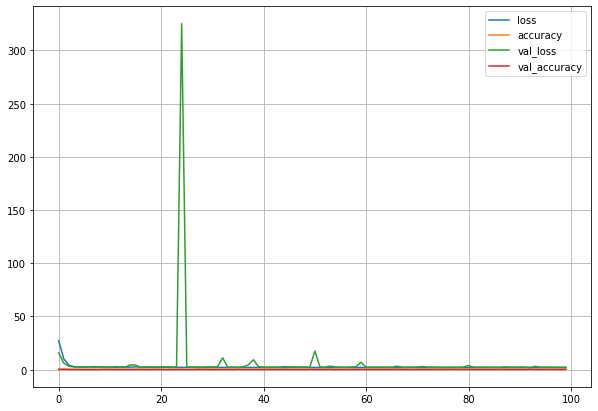

In [58]:
pd.DataFrame(history.history).plot(figsize=(10, 7))
plt.grid(True)

plt.show()

In [59]:
model.evaluate(X_train, y_train)

1407/1407 [==============================] - 5s 4ms/step - loss: 2.1693 - accuracy: 0.2083


[2.1693332195281982, 0.20828889310359955]

In [60]:
model.evaluate(X_valid, y_valid)

157/157 [==============================] - 1s 4ms/step - loss: 2.1718 - accuracy: 0.2112


[2.1718060970306396, 0.21119999885559082]

It converges faster and the model has higher accuracy, nevertheless, the training time has more than doubled compared to the model before.

### Question 2.4 (10 points)

Try regularizing the model with dropout. Then, without retraining your model, see if you can achieve better accuracy using different rate of Dropout.

In [61]:
_20_100_layers = [100]*20

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32,3]))

for n_hidden in _20_100_layers:
    model.add(keras.layers.Dropout(rate=0.2))
    model.add(keras.layers.Dense(n_hidden, activation="relu", kernel_initializer="he_normal"))

model.add(keras.layers.Dense(10, activation="softmax", kernel_regularizer=keras.regularizers.l2(0.01)))

In [62]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999),
              metrics=["accuracy"])

C:\Users\anton\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [63]:
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid))

Epoch 1/100
1407/1407 [==============================] - 15s 10ms/step - loss: 15.8601 - accuracy: 0.1011 - val_loss: 2.4704 - val_accuracy: 0.0976
Epoch 2/100
1407/1407 [==============================] - 13s 9ms/step - loss: 2.4688 - accuracy: 0.1022 - val_loss: 2.4619 - val_accuracy: 0.0972
Epoch 3/100
1407/1407 [==============================] - 13s 9ms/step - loss: 2.4554 - accuracy: 0.0997 - val_loss: 2.4474 - val_accuracy: 0.1010
Epoch 4/100
1407/1407 [==============================] - 13s 9ms/step - loss: 2.4386 - accuracy: 0.0978 - val_loss: 2.4266 - val_accuracy: 0.1036
Epoch 5/100
1407/1407 [==============================] - 13s 9ms/step - loss: 2.4142 - accuracy: 0.1009 - val_loss: 2.3997 - val_accuracy: 0.0972
Epoch 6/100
1407/1407 [==============================] - 13s 9ms/step - loss: 2.3848 - accuracy: 0.0976 - val_loss: 2.3674 - val_accuracy: 0.1010
Epoch 7/100
1407/1407 [==============================] - 13s 9ms/step - loss: 2.3519 - accuracy: 0.0982 - val_loss: 2.3371

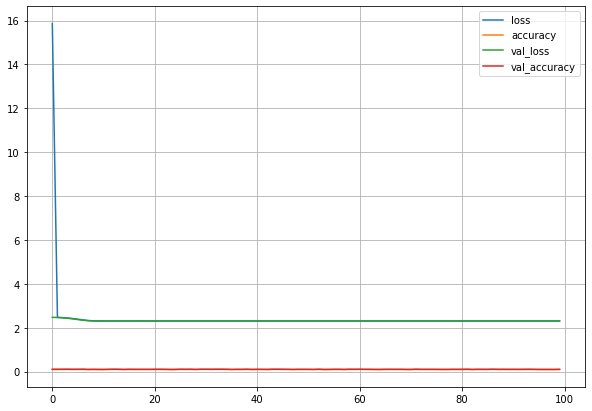

In [64]:
pd.DataFrame(history.history).plot(figsize=(10, 7))
plt.grid(True)

plt.show()

In [65]:
model.evaluate(X_train, y_train)

1407/1407 [==============================] - 4s 3ms/step - loss: 2.3026 - accuracy: 0.1003


[2.3026082515716553, 0.10026666522026062]

In [66]:
model.evaluate(X_valid, y_valid)

157/157 [==============================] - 1s 3ms/step - loss: 2.3029 - accuracy: 0.0976


[2.302945375442505, 0.09759999811649323]

##### Different rate

In [67]:
_20_100_layers = [100]*20

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32,3]))

for n_hidden in _20_100_layers:
    model.add(keras.layers.Dropout(rate=0.6))
    model.add(keras.layers.Dense(n_hidden, activation="relu", kernel_initializer="he_normal"))

model.add(keras.layers.Dense(10, activation="softmax", kernel_regularizer=keras.regularizers.l2(0.01)))

In [68]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999),
              metrics=["accuracy"])

C:\Users\anton\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [69]:
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid))

Epoch 1/100
1407/1407 [==============================] - 15s 10ms/step - loss: 9341.9590 - accuracy: 0.0969 - val_loss: 2.4672 - val_accuracy: 0.0976
Epoch 2/100
1407/1407 [==============================] - 13s 10ms/step - loss: 10.0096 - accuracy: 0.1008 - val_loss: 2.4672 - val_accuracy: 0.0972
Epoch 3/100
1407/1407 [==============================] - 14s 10ms/step - loss: 5.7449 - accuracy: 0.0995 - val_loss: 2.4669 - val_accuracy: 0.1010
Epoch 4/100
1407/1407 [==============================] - 14s 10ms/step - loss: 4.0834 - accuracy: 0.0974 - val_loss: 2.4665 - val_accuracy: 0.1038
Epoch 5/100
1407/1407 [==============================] - 14s 10ms/step - loss: 3.2158 - accuracy: 0.1008 - val_loss: 2.4668 - val_accuracy: 0.0972
Epoch 6/100
1407/1407 [==============================] - 13s 9ms/step - loss: 4.0417 - accuracy: 0.0989 - val_loss: 2.4662 - val_accuracy: 0.0920
Epoch 7/100
1407/1407 [==============================] - 14s 10ms/step - loss: 2.7298 - accuracy: 0.0973 - val_loss

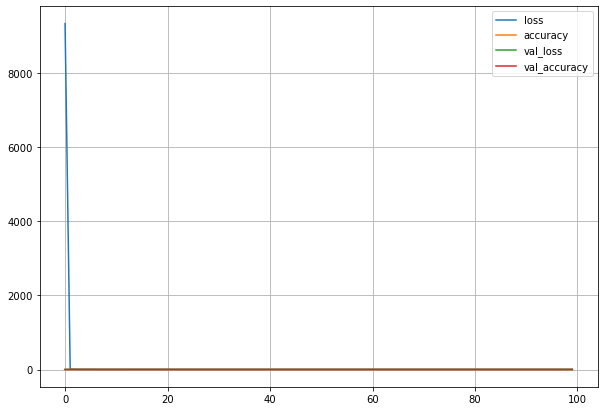

In [70]:
pd.DataFrame(history.history).plot(figsize=(10, 7))
plt.grid(True)

plt.show()

In [71]:
model.evaluate(X_train, y_train)

1407/1407 [==============================] - 4s 3ms/step - loss: 2.3026 - accuracy: 0.1003


[2.302621841430664, 0.10026666522026062]

In [72]:
model.evaluate(X_valid, y_valid)

157/157 [==============================] - 0s 3ms/step - loss: 2.3030 - accuracy: 0.0976


[2.3029592037200928, 0.09759999811649323]

The model performs better with a lower dropout rate such as 0.2. However, the previous model was still better.

### Question 2.5 (10 points) 

Add Earlystopping to the model and save the model at the early stopping epoch using the callbacks. 

Last, load the model and evaluate on the test set.

In [73]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
#patience = Number of epochs with no improvement after which training will be stopped
#monitor = Quantity to be monitored.

In [74]:
_20_100_layers = [100]*20

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32,3]))

for n_hidden in _20_100_layers:
    model.add(keras.layers.Dropout(rate=0.2))
    model.add(keras.layers.Dense(n_hidden, activation="relu", kernel_initializer="he_normal"))

model.add(keras.layers.Dense(10, activation="softmax", kernel_regularizer=keras.regularizers.l2(0.01)))

In [75]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999),
              metrics=["accuracy"])

C:\Users\anton\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [76]:
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),callbacks=[callback])

Epoch 1/100
1407/1407 [==============================] - 15s 10ms/step - loss: 9.4096 - accuracy: 0.0986 - val_loss: 2.4664 - val_accuracy: 0.0976
Epoch 2/100
1407/1407 [==============================] - 13s 9ms/step - loss: 2.4605 - accuracy: 0.0984 - val_loss: 2.4522 - val_accuracy: 0.0972
Epoch 3/100
1407/1407 [==============================] - 13s 9ms/step - loss: 2.4425 - accuracy: 0.0989 - val_loss: 2.4303 - val_accuracy: 0.1010
Epoch 4/100
1407/1407 [==============================] - 14s 10ms/step - loss: 2.4177 - accuracy: 0.0965 - val_loss: 2.4021 - val_accuracy: 0.1038
Epoch 5/100
1407/1407 [==============================] - 14s 10ms/step - loss: 2.3865 - accuracy: 0.1022 - val_loss: 2.3705 - val_accuracy: 0.0972
Epoch 6/100
1407/1407 [==============================] - 13s 10ms/step - loss: 2.3559 - accuracy: 0.0977 - val_loss: 2.3408 - val_accuracy: 0.0918
Epoch 7/100
1407/1407 [==============================] - 13s 10ms/step - loss: 2.3297 - accuracy: 0.0980 - val_loss: 2.3

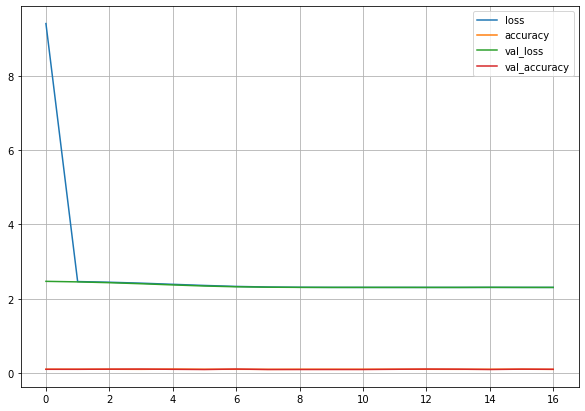

In [77]:
pd.DataFrame(history.history).plot(figsize=(10, 7))
plt.grid(True)

plt.show()

In [78]:
model.evaluate(X_train, y_train)

1407/1407 [==============================] - 4s 3ms/step - loss: 2.3026 - accuracy: 0.1003


[2.3026411533355713, 0.10031110793352127]

In [79]:
model.evaluate(X_valid, y_valid)

157/157 [==============================] - 0s 3ms/step - loss: 2.3029 - accuracy: 0.0972


[2.302860736846924, 0.09719999879598618]

### Question 2.6 Convolutional Neural Network (15 points)

Now, let's define the Convolutional Neural Network. 

❓ **Question** ❓ Define a CNN that is composed of:
- a Conv2D layer with 32 filters, a kernel size of (3, 3), the relu activation function, and a padding equal to `same`
- a MaxPooling2D layer with a pool size of (2, 2)
- a Conv2D layer with 64 filters, a kernel size of (3, 3), the relu activation function, and a padding equal to `same`
- a MaxPooling2D layer with a pool size of (2, 2)
- a Conv2D layer with 128 filters, a kernel size of (3, 3), the relu activation function, and a padding equal to `same`
- a MaxPooling2D layer with a pool size of (3, 3)
- a Flatten layer
- a dense function with 120 neurons with the `relu` activation function
- a dense function with 60 neurons with the `relu` activation function
- a dropout layer (with a rate of 0.5), to regularize the network
- a dense function related to your task

Estimate the model using the same compilation configuration and report your test accuracy. 

In [14]:
X_train = X_train.astype('float32')
X_valid = X_valid.astype('float32')
y_train = y_train.astype('float32')
y_valid = y_valid.astype('float32')

In [7]:
model = keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(32, 3, activation='relu', padding="same"))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Conv2D(64, 3, activation='relu', padding="same"))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Conv2D(128, 3, activation='relu', padding="same"))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(3, 3)))
model.add(keras.layers.Flatten(input_shape=[32, 32,3]))
model.add(keras.layers.Dense(120, activation="relu"))
model.add(keras.layers.Dense(60, activation="relu"))          
model.add(keras.layers.Dropout(rate=0.5))          
model.add(keras.layers.Dense(100, activation="relu", kernel_initializer="he_normal", kernel_regularizer=keras.regularizers.l2(0.01)))          

In [15]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999),
              metrics=["accuracy"])

In [16]:
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid))

Epoch 1/100
1407/1407 [==============================] - 63s 41ms/step - loss: 12.9871 - accuracy: 0.0650 - val_loss: 4.8370 - val_accuracy: 0.1010
Epoch 2/100
1407/1407 [==============================] - 57s 40ms/step - loss: 12.8395 - accuracy: 0.0674 - val_loss: 4.7475 - val_accuracy: 0.1010
Epoch 3/100
1407/1407 [==============================] - 49s 35ms/step - loss: 8.9429 - accuracy: 0.0764 - val_loss: 4.7061 - val_accuracy: 0.1010
Epoch 4/100
1407/1407 [==============================] - 49s 35ms/step - loss: 8.5524 - accuracy: 0.0776 - val_loss: 4.6801 - val_accuracy: 0.1010
Epoch 5/100
1407/1407 [==============================] - 51s 36ms/step - loss: 8.3376 - accuracy: 0.0831 - val_loss: 4.6618 - val_accuracy: 0.1010
Epoch 6/100
1407/1407 [==============================] - 53s 37ms/step - loss: 9.5933 - accuracy: 0.0872 - val_loss: 4.6498 - val_accuracy: 0.1010
Epoch 7/100
1407/1407 [==============================] - 49s 35ms/step - loss: 10.1942 - accuracy: 0.0919 - val_loss

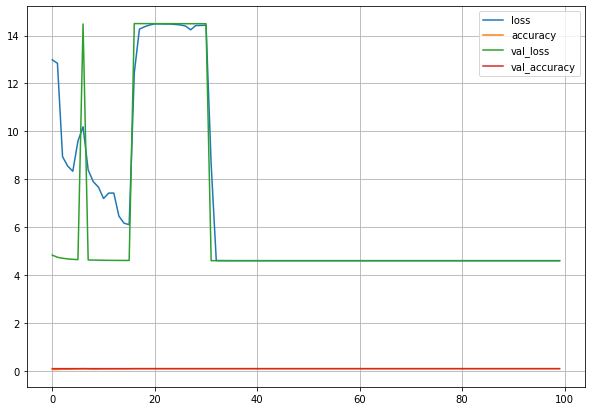

In [17]:
pd.DataFrame(history.history).plot(figsize=(10, 7))
plt.grid(True)

plt.show()

In [18]:
model.evaluate(X_train, y_train)

1407/1407 [==============================] - 17s 12ms/step - loss: 4.6051 - accuracy: 0.0999


[4.605125427246094, 0.0998888909816742]

In [19]:
model.evaluate(X_valid, y_valid)

157/157 [==============================] - 2s 13ms/step - loss: 4.6052 - accuracy: 0.1010


[4.605165004730225, 0.10100000351667404]

### Question 2.7 Transfer learning (15 points)

In this question, we will use the [VGG-16 Neural Network](https://neurohive.io/en/popular-networks/vgg16/), a well-known architecture that has been trained on ImageNet which is a very large database of images of different categories. In a nutshell, this architecture has already learnt kernels which are supposed to be good not only for the task it has been train on but maybe for other tasks. 

The idea is that first layers are not specialized for the particular task it has been trained on; only the last ones are. Therefore, we will load the existing VGG16 network, remove the last fully connected layers, replace them by new connected layers (whose weights are randomly set), and train these last layers on a specific classification task - here, separate types of flower. The underlying idea is that the first convolutional layers of VGG-16, that has already been trained, corresponds to filters that are able to extract meaning features from images. And you will only learn the last layers for your particular problem.

❓ **Question** ❓ Write a first function `load_model()` that loads the pretrained VGG-16 model from `tensorflow.keras.applications.vgg16`. Especially, look at the [documentation](https://www.tensorflow.org/api_docs/python/tf/keras/applications/VGG16) to load the model where:
- the `weights` have been learnt on `imagenet`
- the `input_shape` corresponds to the input shape of any of your images - you have to resize them in case they are not of the same size
- the `include_top` argument is set to `False` in order not to load the fully-connected layers of the VGG-16 without the last layer which was specifically trained on `imagenet`

Write a function that takes the previous model as input the set the girst layers to be non-trainable, by applying `model.trainable = False`. Then check-out the summary of the model to see that now, the parameters are `non-trainable`. Then write a function that adds flattening and dense layers after the first convolutional layers. You can define each layer (or group of layers) separately and concatenate them using the classic `layers.Sequential()` like below: 

```
model = tf.keras.Sequential([
  base_model,
  flattening_layer,
  dense_layer,
  prediction_layer
])
```

Replicate the above steps by adding a flattening and two dense layers (the first with 500 neurons) to the previous VGG-16 model.

Estimate the model using the same compilation configuration and report the test accuracy. 

In [20]:
def load_model():
    model_vgg16 = tf.keras.applications.vgg16.VGG16(
      include_top=False,
      weights='imagenet',
      input_tensor=None,
      input_shape=[32,32,3],
      pooling=None,
      classes=1000,
      classifier_activation='softmax'
    )
    return model_vgg16

In [21]:
def train(): 
    model_vgg16 = load_model()
    for lyr in model_vgg16.layers:
        lyr.trainable = False
    model_vgg16.summary()

    return model_vgg16

In [22]:
def add():
    model_vgg16 = train()
    model = tf.keras.Sequential([
    vgg16,
    keras.layers.Flatten(input_shape=[32,32,3]),
    keras.layers.Dense(500, activation="relu"),
    keras.layers.Dense(100, activation="relu") 
    ])

    return model

In [ ]:
model= add()

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
          optimizer = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999),
          metrics=["accuracy"])

In [23]:
history = model.fit(X_train, y_train, epochs=100,
                validation_data=(X_valid, y_valid))

58900480/58889256 [==============================] - 2s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                              

C:\Users\anton\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/100
1407/1407 [==============================] - 236s 166ms/step - loss: 4.7923 - accuracy: 0.0996 - val_loss: 4.6075 - val_accuracy: 0.1010
Epoch 2/100
1407/1407 [==============================] - 241s 171ms/step - loss: 4.6063 - accuracy: 0.0999 - val_loss: 4.6075 - val_accuracy: 0.1010
Epoch 3/100
1407/1407 [==============================] - 232s 165ms/step - loss: 4.6053 - accuracy: 0.0999 - val_loss: 4.6075 - val_accuracy: 0.1010
Epoch 4/100
1407/1407 [==============================] - 231s 164ms/step - loss: 4.6053 - accuracy: 0.0999 - val_loss: 4.6075 - val_accuracy: 0.1010
Epoch 5/100
1407/1407 [==============================] - 231s 164ms/step - loss: 4.6053 - accuracy: 0.0999 - val_loss: 4.6075 - val_accuracy: 0.1010
Epoch 6/100
1407/1407 [==============================] - 232s 165ms/step - loss: 4.6053 - accuracy: 0.0999 - val_loss: 4.6075 - val_accuracy: 0.1010
Epoch 7/100
1407/1407 [==============================] - 235s 167ms/step - loss: 4.6053 - accuracy: 0.0999

In [24]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 48s 151ms/step - loss: 4.6052 - accuracy: 0.1000


[4.60518217086792, 0.10000000149011612]